In [2]:
import pandas as pd
import matplotlib
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\dakar\Desktop\NFL\raw.csv', low_memory=False)

In [4]:
df

,game_seconds_remaining,yardline_100,down,ydstogo,play_type,pass_length,pass_location,run_location,full_play_type,full_play_type_code,down_1.0,down_2.0,down_3.0,down_4.0,ydstogo_0,ydstogo_1,ydstogo_2,ydstogo_3,ydstogo_4
0,3593.0,0.58,1.0,2,pass,short,left,unknown,pass_left,0,1,0,0,0,0,0,1,0,0
1,3556.0,0.53,2.0,1,run,unknown,unknown,right,run_right,5,0,1,0,0,0,1,0,0,0
2,3515.0,0.56,3.0,1,pass,deep,right,unknown,pass_right,2,0,0,1,0,0,1,0,0,0
3,3496.0,0.98,1.0,2,run,unknown,unknown,middle,run_middle,4,1,0,0,0,0,0,1,0,0
4,3460.0,0.98,2.0,2,pass,short,left,unknown,pass_left,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305161,82.0,0.71,2.0,0,pass,short,right,unknown,pass_right,2,0,1,0,0,1,0,0,0,0
305162,77.0,0.71,3.0,0,pass,short,middle,unknown,pass_middle,1,0,0,1,0,1,0,0,0,0
305163,63.0,0.66,2.0,2,pass,short,middle,unknown,pass_middle,1,0,1,0,0,0,0,1,0,0
305164,58.0,0.66,3.0,2,pass,short,middle,unknown,pass_middle,1,0,0,1,0,0,0,1,0,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
#select important columns for input
X=df[['yardline_100', 'down', 'ydstogo', 'down_1.0', 'down_2.0', 'down_3.0', 'down_4.0','ydstogo_0','ydstogo_1','ydstogo_2','ydstogo_3','ydstogo_4']]
#select result column for output
Y=df['full_play_type_code']
#split data for train and test
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state = 0)

In [7]:
from sklearn.ensemble import RandomForestClassifier
the_clf=RandomForestClassifier(max_depth=8, n_estimators=64)
the_clf.fit(train_x, train_y)

RandomForestClassifier(max_depth=8, n_estimators=64)

In [8]:
from sklearn.metrics import accuracy_score, explained_variance_score
pred = the_clf.predict(test_x)
acc =accuracy_score(test_y, pred)
print(acc)

0.24033974728674043


In [9]:
eacc = explained_variance_score(test_y, pred)
print(eacc)

-0.19544768865212947


In [10]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_y, pred)

In [12]:
from sklearn.metrics import classification_report
pred = the_clf.predict(test_x)
target_names = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
print(classification_report(test_y, pred, target_names=target_names))

              precision    recall  f1-score   support

   Pass Left       0.27      0.04      0.07     15876
 Pass Middle       0.30      0.01      0.02     10241
  Pass Right       0.24      0.81      0.38     17581
    Run Left       0.21      0.10      0.14     11833
  Run Middle       0.25      0.05      0.08      8909
   Run Right       0.22      0.14      0.17     11852

    accuracy                           0.24     76292
   macro avg       0.25      0.19      0.14     76292
weighted avg       0.25      0.24      0.16     76292



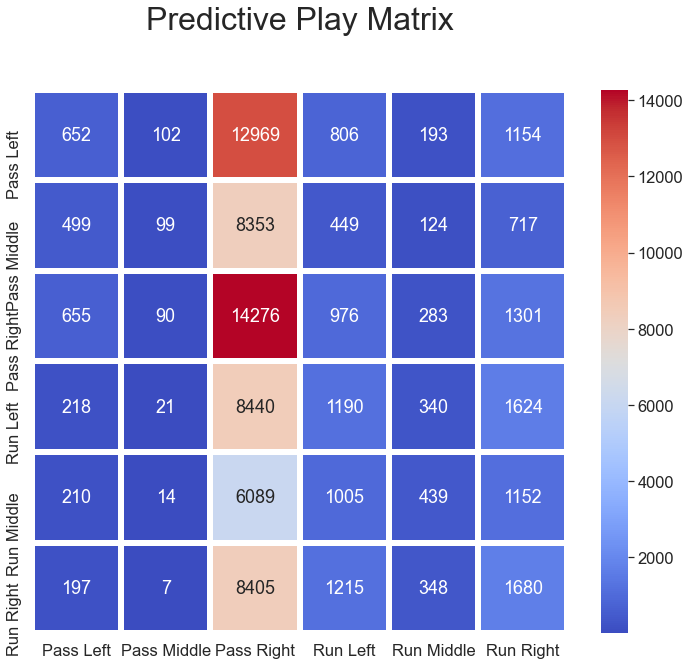

In [16]:
import seaborn as sns
plt.subplots(figsize=(12,10))
plt.title('Predictive Play Matrix', y=1.1, fontsize = 32) 
x_axis_labels = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
y_axis_labels = ['Pass Left', 'Pass Middle', 'Pass Right','Run Left','Run Middle', 'Run Right']
sns.set(font_scale=1.5)
gg = sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap='coolwarm', annot=True, linewidths=5, fmt='g')